In [3]:
# Simple k-Nearest Neighbor for Gait Prediction
#  Load Dataset using Pandas
import pandas as pd 
dataset = pd.read_csv("/Users/jiayu/Desktop/GaitDiscoveryDataBase/Half_Cheetah/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/database-20191028T094346.csv") 
target = dataset["Gait"]
features = dataset
#  Get Clean training labels
del features["Gait"]
del features["GaitNumber"]
#  Train the model
knn.fit(features,target)
knn.predict([[1,0.9]])

array(['Galloping'], dtype=object)

Automatically created module for IPython interactive environment


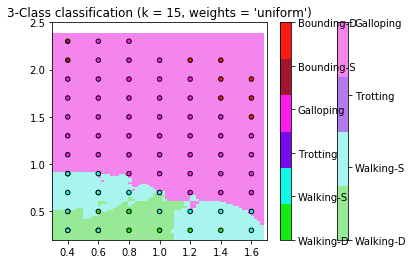

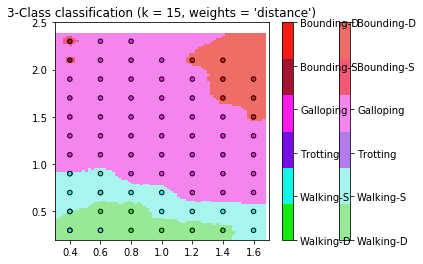

In [151]:
# Gait Mapping Generation using K-Nearest Neighbor
# with Plot function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Define number of neighbors to be considered
n_neighbors = 15

# Load data
import pandas as pd 
dataset = pd.read_csv("/Users/jiayu/Desktop/GaitDiscoveryDataBase/Half_Cheetah/10_Percent_Phaselb/1_MiniForce/0_Degrees_Processed/database-20191028T094346.csv") 
y = dataset["GaitNumber"]
X = dataset
del X["Gait"]
del X["GaitNumber"]
#    Convert to Numpy array
X = X.to_numpy()
y = y.to_numpy()

h = .02  # step size in the mesh

# Define color maps
#                           Walking-D  Walking-S  Trotting  Galloping Bounding-S Bounding-D Pronking  
cmap_light = ['#97e995', '#a8f5ef', '#b27cee','#f485ed','#f65876','#ef6d67','#fac266']
cmap_bold = ['#14eb0f', '#10f9e7', '#750ce9','#ff1af0','#A2142F','#fa1a0f','#f89f0d']

GaitNames = [ 'Walking-D', 'Walking-S','Trotting', 'Galloping', 'Bounding-S', 'Bounding-D', 'Pronking']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Get unique labels, !BE CAREFUL of INDEXING!
    result_unique_labels = np.unique(Z) #unique labels for classification result
    color_mesh_temp = cmap_light[np.min(result_unique_labels)-1:np.max(result_unique_labels)] #build color map for classification result
    sample_unique_labels = np.unique(y) #unique labels for training data
    color_sample_temp = cmap_bold[np.min(sample_unique_labels)-1:np.max(sample_unique_labels)] #
    color_mesh_temp = ListedColormap(color_mesh_temp)
    color_sample_temp = ListedColormap(color_sample_temp)
    
    # Build gait name list, !BE CAREFUL of INDEXING!
    result_gait_names = GaitNames[np.min(result_unique_labels)-1:np.max(result_unique_labels)] #gait name list for classification results
    sample_gait_names = GaitNames[np.min(sample_unique_labels)-1:np.max(sample_unique_labels)] #gait name list for traininig samples
    
    
    # Plot Figures
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=color_mesh_temp)
    cb = plt.colorbar()
    loc = np.arange(0,np.max(result_unique_labels)) + 1
    cb.set_ticks(loc)
    cb.set_ticklabels(result_gait_names)
    plt.xlim([0.3, 1.7])
    plt.ylim([0.2, 2.5])
    
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color_sample_temp,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    cb = plt.colorbar()
    loc = np.arange(0,np.max(sample_unique_labels)) + 1
    cb.set_ticks(loc)
    cb.set_ticklabels(sample_gait_names)
    plt.xlim([0.3, 1.7])
    plt.ylim([0.2, 2.5])
plt.show()
